<a href="https://colab.research.google.com/github/Kaiziferr/machine_learning/blob/main/XGBoost/07_early_stopping_by_significant_difference_maximize_minimize_metric.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import (make_classification, make_regression)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import xgboost as xgb

The objective of this mini-project is to validate the early stopping behavior of the XGBoost library by **maximizing** or **minimizing** the metric.

# **Info**
---
@By: **Steven Bernal**

@Nickname: **Kaiziferr**

@Git: https://github.com/Kaiziferr

# **Config**
---


In [2]:
sns.set(style="darkgrid")
sns.color_palette("tab10")
title_data = 'EarlyStopping'
random_seed=12354
warnings.filterwarnings("ignore")

# **DATA**
---

Synthetic dataset of 1500 records and 20 features is generated, of which 18 are informative and 2 are redundant. The data has a separation of 0.05 with a cluster concentration of 2 and a classification error rate of 5%. The goal is for the data to be somewhat challenging

In [3]:
X, y = make_classification(
    n_samples=1500,
    n_features=20,
    n_informative=18,
    n_redundant=2,
    n_classes=2,
    flip_y=0.05,
    class_sep=2,
    n_clusters_per_class = 2,
    random_state=random_seed
)

**Data split**

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.15,
    random_state=random_seed
)

Configuration function that allows setting up early stopping.

In [5]:
def define_earlyStopping(
    metrica,
    round:int=5,
    min_delta:int=0,
    metric_name:str='error'):
  return xgb.callback.EarlyStopping(
      rounds = round,
      metric_name = metric_name,
      min_delta = min_delta,
      maximize = metrica
  )

The number of rounds is defined, which will be taken into account for the **early stopping** process.

In [6]:
n_rounds = 100

Early stopping will be implemented at the round level, maximizing the metric, with the criterion indicating that the improvement between iterations must be increasingly higher.

In [7]:
early_stop = define_earlyStopping(metrica=True, round=n_rounds, min_delta=0, metric_name='auc')

**Early stopping by rounds Maximaxi metric**

In [8]:
params = {
    'n_estimators': 500,
    'random_state': random_seed,
    'learning_rate': 0.001,
    'objective': 'binary:logistic',
    'eval_metric': "auc",
    'callbacks': [early_stop]
}

In [9]:
model_rondas = xgb.XGBClassifier(**params)
model_rondas.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=0)
results_rondas = model_rondas.evals_result()

To evaluate the behavior, a model was trained in parallel without the early stopping configuration.

In [10]:
del params['callbacks']
model_no_stop_ronda = xgb.XGBClassifier(**params)
model_no_stop_ronda.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=0)
results_no_stop_rondas = model_no_stop_ronda.evals_result()

# **Behavior plot**

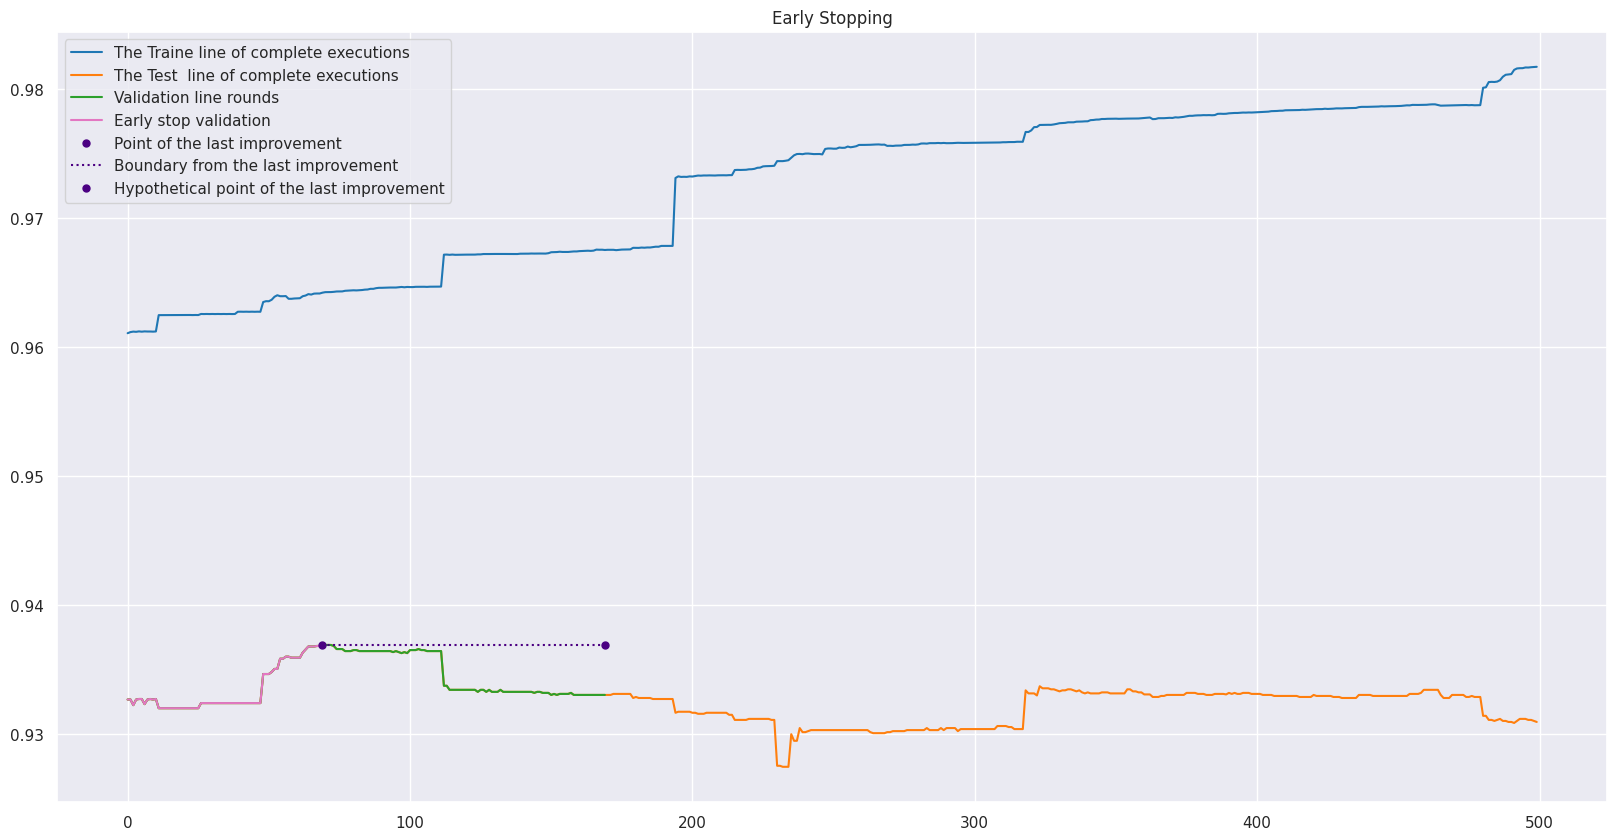

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))

ax.plot(
    results_no_stop_rondas['validation_0']['auc'],
    label='The Traine line of complete executions', color='tab:blue')

ax.plot(
    results_no_stop_rondas['validation_1']['auc'],
    label='The Test  line of complete executions',  color='tab:orange')

ax.plot(
    results_rondas['validation_1']['auc'],
    label='Validation line rounds', color='tab:green')
ax.plot(results_rondas['validation_1']['auc'][:model_rondas.best_iteration],
           color='tab:pink', label='Early stop validation')

ax.plot(
    model_rondas.best_iteration, model_rondas.best_score, 'o', markersize=5,
    label='Point of the last improvement', color='indigo')
ax.plot(
    [ model_rondas.best_iteration, model_rondas.best_iteration+n_rounds],
     [model_rondas.best_score,model_rondas.best_score],
    label='Boundary from the last improvement', color='indigo', linestyle='dotted')
ax.plot(
    model_rondas.best_iteration+n_rounds, model_rondas.best_score, 'o',
    markersize=5, label='Hypothetical point of the last improvement', color='indigo')

ax.legend()
ax.set_title("Early Stopping")
plt.show()

For practical purposes and better visualization, early stopping will be configured with the same exercise to minimize the metric.

- It is evident that the model has a good fit across all iterations, since the validation performance (orange-line) is very close to the training performance (blue-line), and both are above 90% in AUC, therefore they are good at distinguishing between both classes.

- The season stop by maximizing the metric works similarly to early stopping by rounds, as it will halt the process if no better performance is found after 100 rounds, as seen with the purple line. It can also be observed in the figure "o----o," which indicates that there was no significant improvement, since the green line covering the range of iterations where early stopping was applied does not show a peak higher than the "o----o" figure.

# **Behavior plot**

When the minimized metric is used in early stopping, it is typically in regression problems, where metrics are aimed at achieving a minimum score, usually the prediction error. To demonstrate the behavior and contrast of early stopping, the same dataset and classification context were used.

In [12]:
early_stop = define_earlyStopping(metrica=False, round=n_rounds, min_delta=0, metric_name='auc')

In [13]:
params = {
    'n_estimators': 500,
    'random_state': random_seed,
    'learning_rate': 0.001,
    'objective': 'binary:logistic',
    'eval_metric': "auc",
    'callbacks': [early_stop]
}

In [14]:
model_rondas = xgb.XGBClassifier(**params)
model_rondas.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=0)
results_rondas = model_rondas.evals_result()

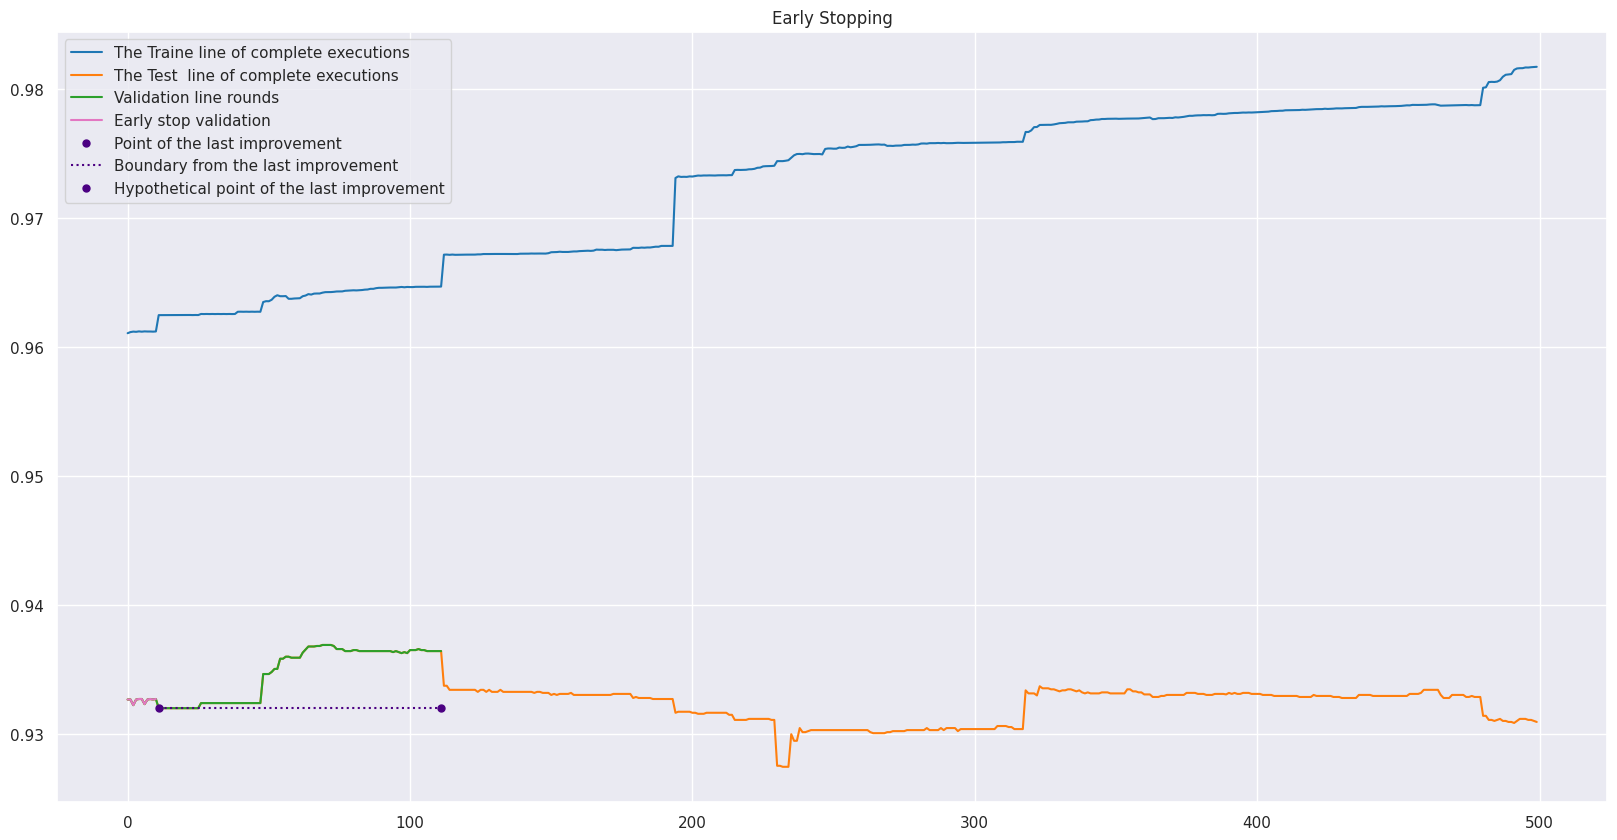

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))

ax.plot(
    results_no_stop_rondas['validation_0']['auc'],
    label='The Traine line of complete executions', color='tab:blue')

ax.plot(
    results_no_stop_rondas['validation_1']['auc'],
    label='The Test  line of complete executions',  color='tab:orange')

ax.plot(
    results_rondas['validation_1']['auc'],
    label='Validation line rounds', color='tab:green')
ax.plot(results_rondas['validation_1']['auc'][:model_rondas.best_iteration],
           color='tab:pink', label='Early stop validation')

ax.plot(
    model_rondas.best_iteration, model_rondas.best_score, 'o', markersize=5,
    label='Point of the last improvement', color='indigo')
ax.plot(
    [ model_rondas.best_iteration, model_rondas.best_iteration+n_rounds],
     [model_rondas.best_score,model_rondas.best_score],
    label='Boundary from the last improvement', color='indigo', linestyle='dotted')
ax.plot(
    model_rondas.best_iteration+n_rounds, model_rondas.best_score, 'o',
    markersize=5, label='Hypothetical point of the last improvement', color='indigo')

ax.legend()
ax.set_title("Early Stopping")
plt.show()

For practical purposes and better visualization, early stopping will be configured with the same exercise to minimize the metric.

- It is evident, compared to the previous analysis, that early stopping halted more quickly (purple line), as the model began to perform better during the 100 validation rounds. This is evident because no peak in the green line is below the "o----o" figure within the range

# **Info**
---
@By: **Steven Bernal**

@Nickname: **Kaiziferr**

@Git: https://github.com/Kaiziferr